In [1]:
#titanic prediction by yahya.
#importing all required modules 
import numpy as n
import pandas as p
import matplotlib.pyplot as plt

In [2]:
train1 = p.read_csv('/kaggle/input/titanicdata/train.csv')
test1 =p.read_csv('/kaggle/input/titanicdata/test.csv')

In [3]:
# Fixed section:  to fill missing values 
train1['Age']= train1['Age'].fillna(train1['Age'].median())
train1['Embarked'] =train1['Embarked'].fillna('S')
test1['Age'] =test1['Age'].fillna(test1['Age'].median())
test1['Fare'] = test1['Fare'].fillna(test1['Fare'].median())


In [4]:
# Encode categorical features
sexmap ={'male': 0, 'female': 1}
embarkedmap = {'S': 0, 'C': 1, 'Q': 2}
train1['Sex'] = train1['Sex'].map(sexmap)
train1['Embarked'] = train1['Embarked'].map(embarkedmap)
test1['Sex'] = test1['Sex'].map(sexmap)
test1['Embarked'] = test1['Embarked'].map(embarkedmap)


In [5]:
# Selectfeatures
features= ['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train1[features].values
y_train =train1['Survived'].values.reshape(-1, 1)
X_test = test1[features].values

In [6]:
# normalize
X_mean = n.mean(X_train, axis=0)
X_std = n.std(X_train, axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [7]:
# add bias column
X_train = n.hstack([n.ones((X_train.shape[0],1)), X_train])
X_test =n.hstack([n.ones((X_test.shape[0],1)), X_test])


In [8]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + n.exp(-z))

In [9]:
def compute_loss(y, h):
    h = n.clip(h, 1e-7, 1 - 1e-7)
    return -n.mean(y * n.log(h) + (1 - y) * n.log(1 - h))



In [10]:
def train(X, y, lr=0.1, epochs=1000):
    m, num_features = X.shape
    theta = n.zeros((num_features, 1))
    losses = []

    for i in range(epochs):
        z = n.dot(X, theta)
        h = sigmoid(z)
        loss = compute_loss(y, h)
        gradient = n.dot(X.T, (h - y)) / m
        theta -= lr * gradient
        losses.append(loss)

    return theta, losses



In [11]:
theta, losses = train(X_train, y_train, lr=0.1, epochs=1000)


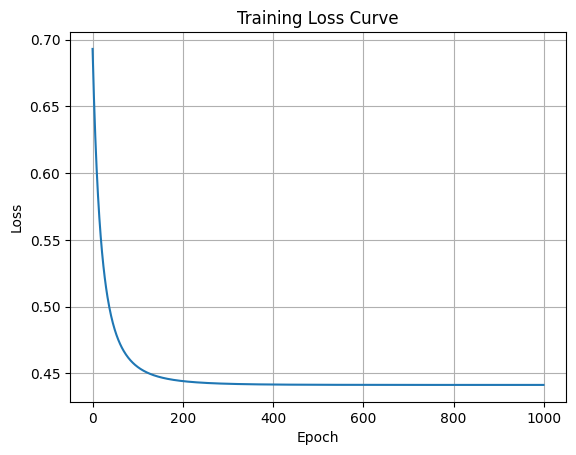

In [12]:
#ploting the finl graph
plt.plot(losses )
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show( )


In [13]:
# Predict on test
preds = sigmoid(n.dot(X_test, theta))
pre_labels =(preds > 0.5).astype(int)


In [14]:
# Save to submission
submission= p.DataFrame({
    'PassengerId': test1['PassengerId'],
    'Survived': pre_labels.ravel().astype(int)
})

submission.to_csv('submission.csv', index=False)
print("submission.csv created!")

submission.csv created!
